In [36]:
#Import Pacakges
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

from math import ceil
import numpy as np
#from dstools import data_tools

import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 8

In [6]:
data = pd.read_csv('merge_sample.csv')
data.head() 

,act_activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,...,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38,people_year,people_month,people_day
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,84,2023,2,2
1,3,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,34,2022,10,14
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2022,10,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2022,10,16
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2022,10,16


In [7]:
X = data.drop('act_outcome',1)
Y = data['act_outcome']

In [8]:
#Build the baseline model of LR

param_grid_lr = {'C':[10**i for i in range(-3, 3)], 
                 'penalty':['l1', 'l2']}

kfolds = KFold(X.shape[0], n_folds = 6)
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid_lr, cv = kfolds, scoring = 'roc_auc') 
lr_grid_search.fit(X, Y)

best_1 = lr_grid_search.best_score_
print(best_1)

#0.887 

0.886872051335


In [9]:
lr_grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
#Build up a pineline for feature engineering
# using scalarized / stardarized data

steps = [('scaler',StandardScaler()),
         ('lr',LogisticRegression())]

pipeline = Pipeline(steps)

parameters_2 = dict(lr__C = [10**i for i in range(-3, 3)],
                  lr__penalty = ['l1', 'l2'])

lr_grid_search_2 = GridSearchCV(pipeline, param_grid = parameters_2, cv = 6, scoring = 'roc_auc')
lr_grid_search_2.fit(X, Y)

best_2 = lr_grid_search_2.best_score_
best_2

# 0.893
#0.835 - double sized data

0.89263232117572289

In [11]:
lr_grid_search_2.best_estimator_

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [ ]:
# Using dummiazed data:
dum_data = pd.read_csv('dummiazed_data.csv')
X = dum_data.drop(ct_outcome',1)
Y = dum_data['act_outcome']

param_grid_lr_3 = {'C':[10**i for i in range(-3, 3)], 
                 'penalty':['l1', 'l2']}

kfolds = KFold(X.shape[0], n_folds = 6)
lr_grid_search_3 = GridSearchCV(LogisticRegression(), param_grid_lr_3, cv = 6, scoring = 'roc_auc') 
lr_grid_search_3.fit(X, Y)

best_3 = lr_grid_search_3.best_score_
print(best_3)

# AUC = 0.90934

In [ ]:
#Polynomial Feature
steps_4 = [('polyfeat', PolynomialFeatures()),
         ('scaler', StandardScaler()),
         ('lr', LogisticRegression())]

pipeline_4 = Pipeline(steps_4)

 
parameters_4 = dict(polyfeat__degree = [1, 2],
                    polyfeat__interaction_only = [True, False],
                    lr__C = [10**i for i in range(-3, 3)],
                    lr__penalty = ['l1', 'l2'])

lr_grid_search_4 = GridSearchCV(pipeline_4, param_grid = parameters_4, cv = 6, scoring = 'roc_auc')

lr_grid_search_4.fit(X, Y)

best_4 = lr_grid_search_4.best_score_
print(best_4)

In [ ]:
lr_grid_search_4.best_estimator_

In [15]:
#Feature Selection
steps_5 = [('featureSelection',SelectFromModel(LogisticRegression())),
           ('lr',LogisticRegression())]
pipeline_5 = Pipeline(steps_5)

parameters_5 = dict(lr__C = [10**i for i in range(-3, 3)],
                    lr__penalty = ['l1', 'l2'],
                    featureSelection__threshold = [0.2,0.3])
lr_grid_search_5 = GridSearchCV(pipeline_5, param_grid=parameters_5, cv=kfolds,scoring = 'accuracy' )
lr_grid_search_5.fit(X,Y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=43946, n_folds=6, shuffle=False, random_state=None),
       error_score='raise',
       estimator=Pipeline(steps=[('featureSelection', SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0,...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10, 100], 'lr__penalty': ['l1', 'l2'], 'featureSelection__threshold': [0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [16]:
lr_grid_search_5.best_estimator_

Pipeline(steps=[('featureSelection', SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0,...ty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [18]:
lr_grid_search_5.best_score_

0.80776407409092976

# Visualization

In [45]:
# Select the best model to visualize: Model using dummiazed data with C = 0.01, penalty = l1
data = pd.read_csv('double sample with dummies.csv')
X = data.drop('act_outcome',1)
Y = data['act_outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)

In [30]:
#ROC curve
# Best model is the LR with C = 0.01 and 'l1' penalty and using dummies data

model = LogisticRegression(C=0.01, penalty='l1')
model.fit(X_train, Y_train)

Y_test_probability_1 = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)

auc = np.mean(cross_val_score(model, X, Y, scoring="roc_auc",cv = 10))
accuracy = np.mean(cross_val_score(model, X, Y, scoring="accuracy",cv = 10))

In [31]:
print(accuracy) # 0.857

0.85734971407


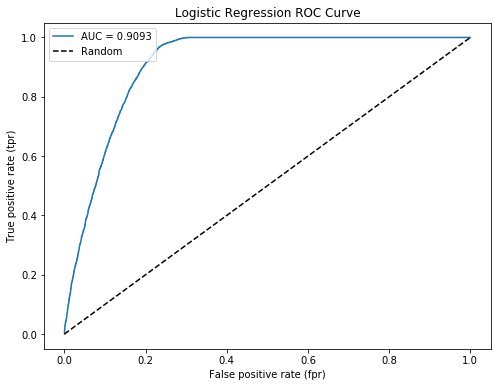

In [32]:
plt.plot(fpr, tpr, label="AUC = %.4f" %auc)
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("Logistic Regression ROC Curve")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

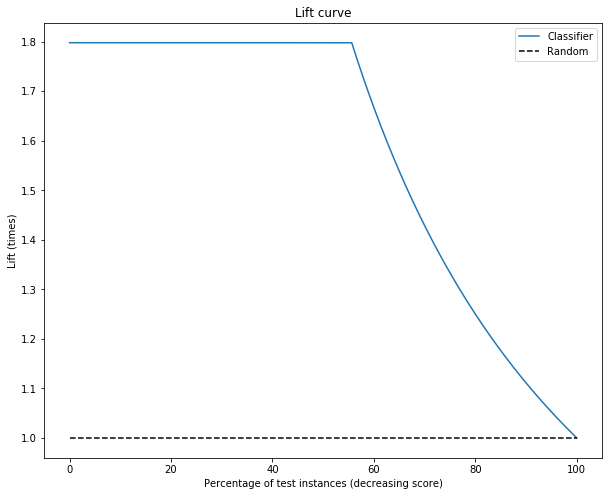

In [37]:
# lift curve
Y_test_predicted = model.predict(X_test)

# Sort these predictions, probabilities, and the true value in descending order of probability
order = np.argsort(Y_test_probability_1)[::-1]
Y_test_predicted_sorted = Y_test_predicted[order]
Y_test_probability_1_sorted = Y_test_probability_1[order]
Y_test_sorted = np.array(Y_test)[order]

# Go record-by-record and build the cumulative response curve
x_cumulative = []
y_cumulative = []
total_test_positives = np.sum(Y_test)
for i in range(1, len(Y_test_probability_1_sorted)+1):
    x_cumulative.append(i)
    y_cumulative.append(np.sum(Y_test_sorted[0:i]) / float(total_test_positives))

# Rescale
x_cumulative = np.array(x_cumulative)/float(np.max(x_cumulative)) * 100
y_cumulative = np.array(y_cumulative) * 100

x_lift = x_cumulative
y_lift = y_cumulative/x_lift

plt.plot(x_lift, y_lift, label="Classifier")
plt.plot([0,100], [1,1], 'k--', label="Random")
plt.xlabel("Percentage of test instances (decreasing score)")
plt.ylabel("Lift (times)")
plt.title("Lift curve")
plt.legend()
plt.show()

In [77]:
#learning curve:
data = pd.read_csv('double sample with dummies.csv')
train = data.sample(frac = 0.9)
test = pd.concat([data,train]).drop_duplicates(keep = False)

X_test =test.drop('act_outcome',1)
Y_test = test['act_outcome']
training_size = np.arange(0.01,1,0.01)
aucs = []

for s in training_size:
    data_part = train.sample(frac = s)
    X_part_train =data_part.drop('act_outcome',1)
    Y_part_train = data_part['act_outcome']
   
    #scaler = StandardScaler().fit(X_part_train)
    #X_train_scalered = scaler.transform(X_part_train)                
    #X_test_scalered = scaler.transform(X_test)
    
    model = LogisticRegression(C=0.01, penalty='l1')
    model.fit(X_part_train, Y_part_train)
    
    aucs.append(metrics.accuracy_score(Y_test,model.predict(X_test)))

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


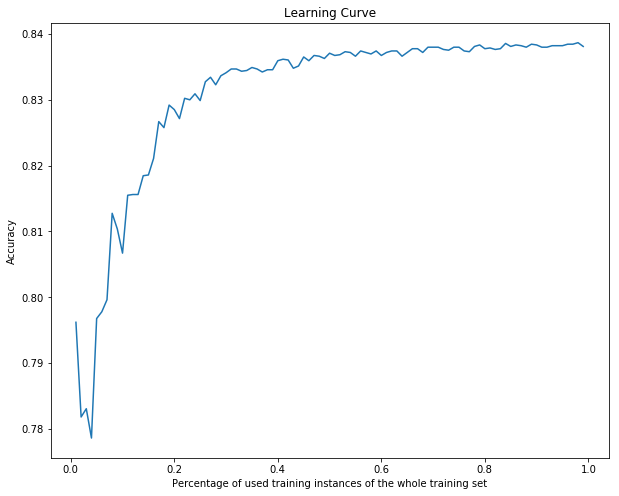

In [80]:
plt.plot(training_size,aucs)
plt.xlabel("Percentage of used training instances of the whole training set")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()